# This notebook calculates the normal vector for every coastline grid cell 

In [35]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters') # directory

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tqdm import tqdm

In [37]:
# load classification CSV:
numerical_df = pd.read_csv('cell_geo_type.csv')

In [38]:
# define a function to calculate the normal vector angle
def calculate_normal_vector_angle(matrix):
    
    # define direction vectors for the 8 surrounding cells
    directions = [(-1, -1), (-1, 0), (-1, 1),(0, -1), 
                  (0, 1), (1, -1), (1, 0), (1, 1)]
    
    normal_x = 0
    normal_y = 0

    for (dy, dx), value in zip(directions, matrix.flatten()):
        if value == 1:
            normal_x += dx
            normal_y += dy
        elif value == 0:
            normal_x -= dx
            normal_y -= dy
    
    # calculate the angle in degrees
    angle = np.degrees(np.arctan2(normal_y, normal_x)) % 360
    return angle

In [39]:
# perform normal vector calculations

# initialize lists
positions = []
u_list = []
v_list = []

# initialize output df
u_df = numerical_df.copy()
u_df[:] = np.nan
v_df = u_df.copy()

# for each row
for i in tqdm(range(1, numerical_df.shape[0] - 1)):
    # for each column
    for j in range(1, numerical_df.shape[1] - 1):
        if numerical_df.iat[i, j] == 2:
            
            # get 3x3 matrix around current grid cell
            matrix = numerical_df.iloc[i-1:i+2, j-1:j+2].values
            
            # calculate the angle of the normal vector
            angle = calculate_normal_vector_angle(matrix)
            
            # calculate the vector components
            u = np.cos(np.radians(angle))
            v = np.sin(np.radians(angle))
            
            # save vector components in the output dataframe as a tuple:
            u_df.iat[i, j] = u
            v_df.iat[i, j] = v
            
            # store the position and the vector components
            positions.append((i, j))
            u_list.append(u)
            v_list.append(v)

100%|██████████| 68/68 [00:00<00:00, 78.85it/s] 


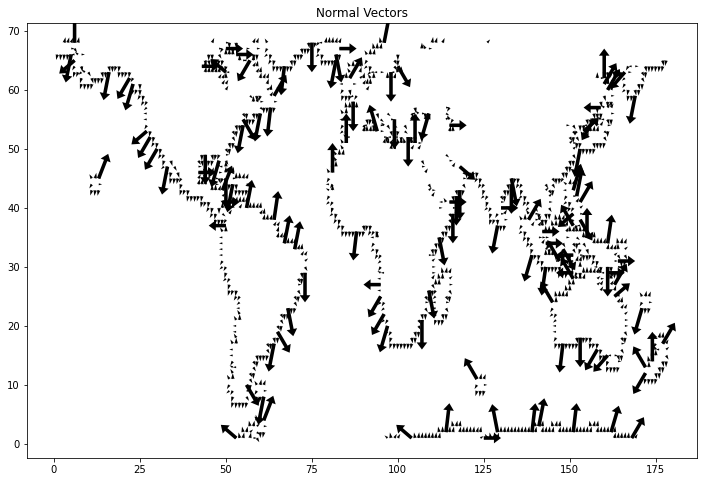

In [40]:
# convert positions to X and Y arrays
positions = np.array(positions)
X, Y = positions[:, 1], positions[:, 0]

# convert u and v to numpy arrays
u = np.array(u)
v = np.array(v)

# plot the vectors using plt.quiver
plt.figure(figsize=(12, 8))
plt.quiver(X, Y, u_list, v_list, angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver(X[::10], Y[::10], u_list[::10], v_list[::10], angles = 'xy', scale_units = 'xy', scale = 0.2, headlength = 2, headaxislength=2)
plt.title('Normal Vectors')
#plt.xlim(25,75)
#plt.ylim(5,50)
plt.show()

In [46]:
# save u_df and v_df as CSV
u_df.to_csv('u_df.csv', index=False)
v_df.to_csv('v_df.csv', index=False)